<a href="https://colab.research.google.com/github/daawonn/R_project/blob/master/3_R%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%95%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결측치 정제하기
- 결측치(Missing Value) 
  - 누락된 값, 비어잆는 값
  - 함수 적용 불가, 분석 결과 왜곡 
  - 제거 후 분석 실시

- 결측치 만들기 
- 결측치 표기 
  - 대문자 NA 

In [1]:
df <- data.frame(sex = c("M", "F", NA, "M", "F"),
                    score = c(5, 4, 3, 4, NA))
df 

sex,score
<fct>,<dbl>
M,5
F,4
NA,3
M,4
F,NA


In [2]:
# 결측치 확인하기
is.na(df)

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


In [3]:
table(is.na(df))


FALSE  TRUE 
    8     2 

- 변수별로 결측치 확인하기 

In [4]:
table(is.na(df$sex))    # sex 결측치 빈도 출력
table(is.na(df$score))  # score 결측치 빈도 출력


FALSE  TRUE 
    4     1 


FALSE  TRUE 
    4     1 

In [5]:
# 결측치 포함된 상태로 분석 
mean(df$score)  # 평균 산출
sum(df$score)   # 합계 산출

[1] NA

[1] NA

- 결측치 제거하기

In [6]:
# 결측치 있는 행 제거하기 
library(dplyr) # dplyr 패키지 로드
df %>% filter(is.na(score))   # score 가 NA 인 데이터만 출력


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




sex,score
<fct>,<dbl>
F,NA


In [7]:
df %>% filter(!is.na(score))  # score 결측치 제거

sex,score
<fct>,<dbl>
M,5
F,4
NA,3
M,4


- 결측치 제외한 데이터로 분석하기

In [8]:
df_nomiss <- df %>% filter(!is.na(score))  # score 결측치 제거
mean(df_nomiss$score)                      # score 평균 산출 

[1] 4

In [9]:
sum(df_nomiss$score) # score 합계 산출

[1] 16

- 여러 변수 동시에 결측치 없는 데이터 추출하기 

In [10]:
# score, sex 결측치 제외
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex)) 
df_nomiss

sex,score
<fct>,<dbl>
M,5
F,4
M,4


- 결측치가 하나라도 있으면 제거하기

In [11]:
df_nomiss2 <- na.omit(df)  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2                 # 출력
# 분석에 필요한 데이터까지 손실 될 가능성 유의 
# ex) 성별-소득 관계 분석하는데 지역 결측치까지 제거 

,sex,score
,<fct>,<dbl>
1,M,5
2,F,4
4,M,4


- 함수의 결측치 제외 기능 이용하기 
    - na.rm = T 

In [12]:
mean(df$score, na.rm = T)  # 결측치 제외하고 평균 산출
sum(df$score, na.rm = T)   # 결측치 제외하고 합계 산출

[1] 4

[1] 16

## summarise()에서 na.rm = T사용하기 

In [0]:
# 결측치 생성 
exam <- read.csv("csv_exam.csv")            # 데이터 불러오기
exam[c(3, 8, 15), "math"] <- NA             # 3, 8, 15 행의 math 에 NA 할당 

In [14]:
# 평균 구하기 
exam %>% summarise(mean_math = mean(math))   # 평균 산출

mean_math
<dbl>
NA


In [15]:
exam %>% summarise(mean_math = mean(math, na.rm = T))  # 결측치 제외하고 평균 산출

mean_math
<dbl>
55.23529


In [17]:
# 다른 함수들에 적용 
exam %>% summarise(mean_math = mean(math, na.rm = T),       # 평균 산출
                    sum_math = sum(math, na.rm = T),        # 합계 산출
                    median_math = median(math, na.rm = T))  # 중앙값 산출

mean_math,sum_math,median_math
<dbl>,<int>,<int>
55.23529,939,50


##결측치 대체하기 
- 결측치 많을 경우 모두 제외하면 데이터 손실 큼 
- 대안: 다른 값 채워넣기 
- 결측치 대체법(Imputation) 
  - 대표값(평균, 최빈값 등)으로 일괄 대체 
  - 통계분석 기법 적용, 예측값 추정해서 대체

- 평균값으로 결측치 대체하기 

In [18]:
# 평균 구하기 
mean(exam$math, na.rm = T)  # 결측치 제외하고 math 평균 산출

[1] 55.23529

In [19]:
# 평균으로 대체하기 
exam$math <- ifelse(is.na(exam$math), 55, exam$math)  # math 가 NA 면 55 로 대체
table(is.na(exam$math))                               # 결측치 빈도표 생성 


FALSE 
   20 

In [20]:
exam

id,class,math,english,science
<int>,<int>,<dbl>,<int>,<int>
1,1,50,98,50
2,1,60,97,60
3,1,55,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,55,78,25
9,3,20,98,15


In [21]:
mean(exam$math)  # 수학의 평균값 산출

[1] 55.2

## 혼자서 해보기(1)
mpg 데이터를 이용해서 분석 문제를 해결해 보세요. 
mpg 데이터 원본에는결측치가 없습니다. 우선 mpg 데이터를 불러와 몇 개의 값을 결측치로 만들겠습니다. 아래 코드를 실행하면 다섯 행의 hwy 변수에 NA가 할당됩니다. 

In [0]:
mpg <- as.data.frame(ggplot2::mpg)           # mpg 데이터 불러오기
mpg[c(65, 124, 131, 153, 212), "hwy"] <- NA  # NA 할당하기 

Q1. drv(구동방식)별로 hwy(고속도로 연비) 평균이 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에 결측치가 있는지 확인해야 합니다. drv 변수와 hwy 변수에 결측치가 몇 개 있는지 알아보세요. 

In [23]:
table(is.na(mpg$drv))
table(is.na(mpg$hwy))  


FALSE 
  234 


FALSE  TRUE 
  229     5 

Q2. filter()를 이용해 hwy 변수의 결측치를 제외하고, 어떤 구동방식의 hwy 평균이 높은지 알아보세요. 하나의 dplyr 구문으로 만들어야 합니다. 

In [24]:
mpg %>% filter(!is.na(mpg$hwy)) %>%
group_by(drv) %>%
summarise(mean_drv=mean(hwy))

drv,mean_drv
<chr>,<dbl>
4,19.24242
f,28.20000
r,21.00000


## 이상치 정제하기
- 이상치(Outlier) - 정상범주에서 크게 벗어난 값 
  - 이상치 포함시 분석 결과 왜곡 
  - 결측 처리 후 제외하고 분석 이상치 

|이상치종류|예|해결방법|
|--|--|--|
|존재할 수 없는 값|성별 변수에 3|결측처리|
|극단적인 값|몸무게 변수에 200|정상범위 기준 정해서 결측처리|


- 이상치 제거하기 (1)
- 존재할 수 없는 값
- 논리적으로 존재할 수 없으므로 바로 결측 처리 후 분석시 제외 

In [25]:
# 이상치 포함된 데이터 생성 - sex 3, score 6 
outlier <- data.frame(sex = c(1, 2, 1, 3, 2, 1), 
                      score = c(5, 4, 3, 4, 2, 6)) 
outlier

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
3,4
2,2
1,6


In [27]:
table(outlier$sex) 
table(outlier$score)


1 2 3 
3 2 1 


2 3 4 5 6 
1 1 2 1 1 

In [29]:
# 결측 처리하기 - sex 
# sex 가 3 이면 NA 할당
outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex)
outlier

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
NA,4
2,2
1,6


In [30]:
# 결측 처리하기 - score 
# score 가 1~5 아니면 NA 할당
outlier$score <- ifelse(outlier$score > 5, NA, outlier$score)
outlier

sex,score
<dbl>,<dbl>
1,5
2,4
1,3
NA,4
2,2
1,NA


In [31]:
# 결측치 제외하고 분석 
outlier %>%   
  filter(!is.na(sex) & !is.na(score)) %>%   
  group_by(sex) %>%  
  summarise(mean_score = mean(score)) 

sex,mean_score
<dbl>,<dbl>
1,4
2,3


- 이상치 제거하기 (2) 
- 극단적인 값 
- 정상범위 기준 정해서 벗어나면 결측 처리 

|판단기준|예|
|--|--|
|논리적 판단|성인 몸무게 40~150kg 벗어나면 극단치|
|통계적 판단|상하위 0.3% 극단치 또는 상자그림 벗어나면 극단치|

- 상자그림으로 극단치 기준 정해서 제거하기 

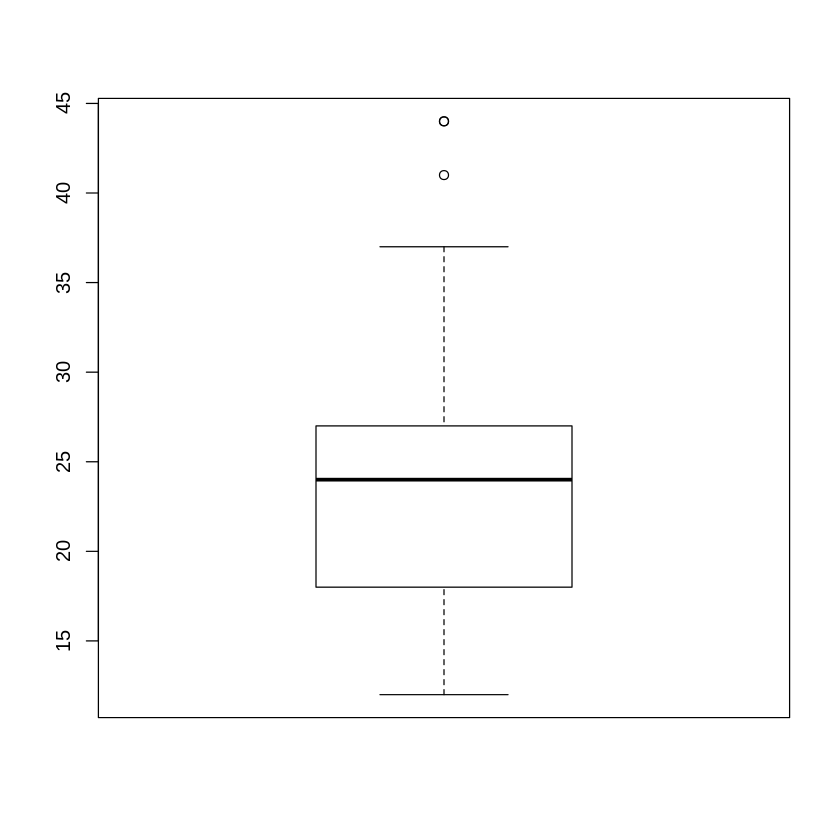

In [32]:
#상자그림 생성 
mpg <- as.data.frame(ggplot2::mpg) 
boxplot(mpg$hwy)

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

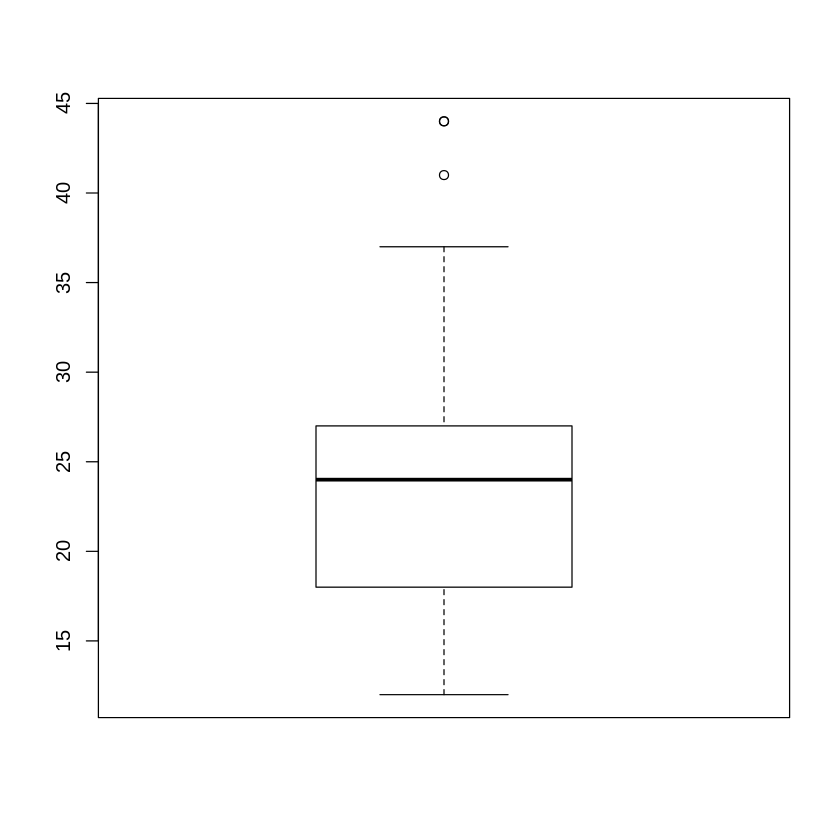

In [33]:
#상자그림 통계치 출력 
boxplot(mpg$hwy)$stats 

In [34]:
# 결측 처리하기 
# 12~37 벗어나면 NA 할당
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy) 
table(is.na(mpg$hwy)) 


FALSE  TRUE 
  231     3 

In [35]:
# 결측치 제외하고 분석하기 
mpg %>%   
group_by(drv) %>%   
summarise(mean_hwy = mean(hwy, na.rm = T)) 

drv,mean_hwy
<chr>,<dbl>
4,19.17476
f,27.72816
r,21.00000


# 혼자서 해보기(2)
mpg 데이터를 이용해서 분석 문제를 해결해 보세요. 
우선 mpg 데이터를 불러와서 일부러 이상치를 만들겠습니다. drv(구동방식) 변수의 값은 4(사륜구동), f(전륜구동), r(후륜구동) 세 종류로 되어있습니다. 몇 개의 행에 존재할 수 없는 값 k를 할당하겠습니다. cty(도시 연비) 변수도 몇 개의 행에 극단적으로 크거나 작은 값을 할당하겠습니다. 

In [0]:
mpg <- as.data.frame(ggplot2::mpg)                  # mpg 데이터 불러오기
mpg[c(10, 14, 58, 93), "drv"] <- "k"                # drv 이상치 할당
mpg[c(29, 43, 129, 203), "cty"] <- c(3, 4, 39, 42)  # cty 이상치 할당

이상치가 들어있는 mpg 데이터를 활용해서 문제를 해결해보세요. 
구동방식별로 도시 연비가 다른지 알아보려고 합니다. 분석을 하려면 우선 두 변수에 이상치가 있는지 확인하려고 합니다. 

Q1. drv 에 이상치가 있는지 확인하세요. 이상치를 결측 처리한 다음 이상치가 사라졌는지 확인하세요. 결측 처리 할 때는 %in% 기호를 활용하세요. 

In [42]:
table(mpg$drv)


  4   f   k   r 
100 106   4  24 

In [43]:
mpg$drv <- ifelse(mpgr$drv %in% c("f", "4", "r")) ,mpg$drv, NA)

ERROR: ignored

In [48]:
mpg %>% filter(drv %in% c("f", "4", "r")) %>% head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,audi,a4,1.8,1999,4,auto(l5),f,18,18,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,21,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,20,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,21,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,16,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,18,p,compact
7,audi,a4,3.1,2008,6,auto(av),f,18,18,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,18,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,16,p,compact


Q2. 상자 그림을 이용해서 cty 에 이상치가 있는지 확인하세요. 상자 그림의 통계치를 이용해 정상 범위를 벗어난 값을 결측 처리한 후 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하세요. 

9
14
16
19
26


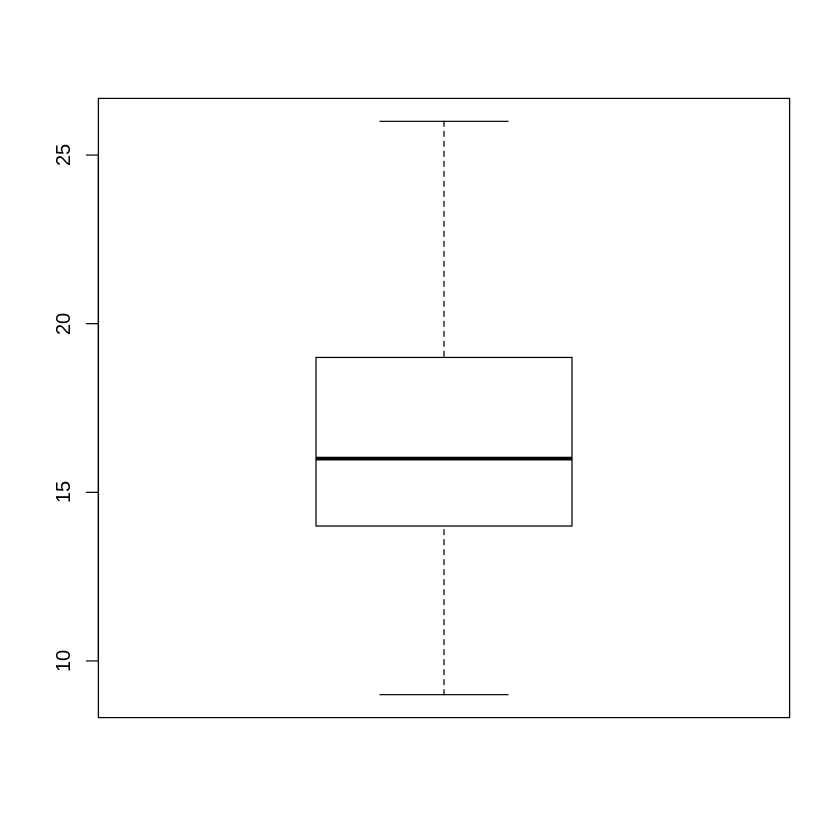

In [49]:
boxplot(mpg$cty)$stats

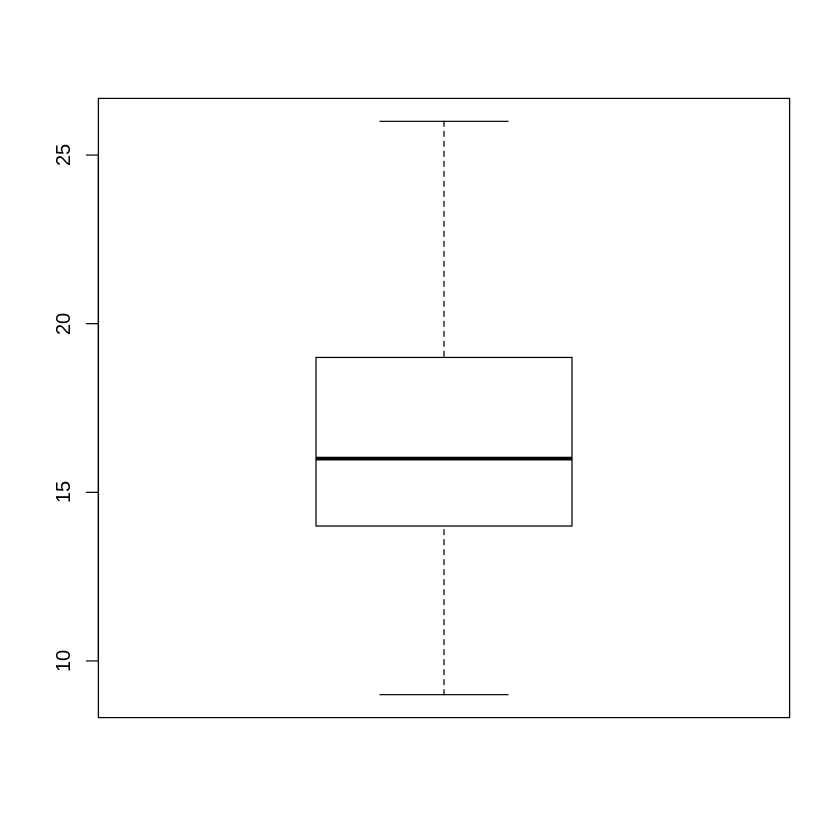

In [50]:
mpg$cty <- ifelse(mpg$cty < 9 | mpg$cty > 26, NA, mpg$cty) 
boxplot(mpg$cty)

Q3. 두 변수의 이상치를 결측처리 했으니 이제 분석할 차례입니다. 이상치를 제외한 다음 drv 별로 cty 평균이 어떻게 다른지 알아보세요. 하나의 dplyr 구문으로 만들어야 합니다. 

In [51]:
mpg %>%   filter(!is.na(drv) & !is.na(cty)) %>%  # 결측치 제외
   group_by(drv) %>%                      # drv 별 분리
   summarise(mean_hwy = mean(cty))        # cty 평균 구하기

drv,mean_hwy
<chr>,<dbl>
4,14.24742
f,19.47000
k,16.75000
r,13.95833


## 정리하기

In [0]:
# 1. 결측치 정제하기
# 결측치 확인
table(is.na(df$score)) 
 
# 결측치 제거
df_nomiss <- df %>% filter(!is.na(score)) 
 
# 여러 변수 동시에 결측치 제거
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex)) 
 
# 함수의 결측치 제외 기능 이용하기
mean(df$score, na.rm = T) exam %>% summarise(mean_math = mean(math, na.rm = T)) 


# 2. 이상치 정제하기
# 이상치 확인
table(outlier$sex) 
 
# 결측 처리
outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex) 
 
# boxplot 으로 극단치 기준 찾기
boxplot(mpg$hwy)$stats 
 
# 극단치 결측 처리
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy) 